In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics,naive_bayes
import numpy as np
import seaborn as sns


In [37]:
loan_data=pd.read_csv('/content/drive/My Drive/loan_pred/train_ctrUa4K.csv')
loan_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [38]:
loan_data.shape
#loan_data.describe

(614, 13)

In [39]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
modified_data=loan_data[['Dependents','Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area','Credit_History']]
modified_data.head()

,Dependents,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History
0,0,Male,No,Graduate,No,5849,0.0,NaN,360.0,Urban,1.0
1,1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,Rural,1.0
2,0,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,Urban,1.0
3,0,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,1.0
4,0,Male,No,Graduate,No,6000,0.0,141.0,360.0,Urban,1.0


In [41]:
#print(modified_data['Gender'].value_counts())
#print(modified_data['Married'].value_counts())
#print(modified_data['Dependents'].value_counts())
#print(modified_data['Education'].value_counts())
#print(modified_data['Self_Employed'].value_counts())
print(modified_data['Property_Area'].value_counts())
print(modified_data['Credit_History'].value_counts())
print(modified_data['Loan_Amount_Term'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [42]:
for i in range(len(modified_data['Gender'])):
  if(modified_data['Gender'][i] != 'Male' and modified_data['Gender'][i] !="Female"):
    modified_data['Gender'][i]='Male'

for i in range(len(modified_data['Married'])):
  if(modified_data['Married'][i] != 'No' and modified_data['Married'][i] !="Yes"):
    modified_data['Married'][i]='Yes'

for i in range(len(modified_data['Dependents'])):
  if(modified_data['Dependents'][i] != '0' and modified_data['Dependents'][i] !="1" and modified_data['Dependents'][i] !="2" and modified_data['Dependents'][i] !="3+"):
    modified_data['Dependents'][i]='0'



for i in range(len(modified_data['Dependents'])):
  if( modified_data['Dependents'][i] =="3+"):
    modified_data['Dependents'][i]='3'







for i in range(len(modified_data['Education'])):
  if(modified_data['Education'][i] != 'Graduate' and modified_data['Education'][i] !="Not Graduate" ):
    modified_data['Education'][i]='Graduate'

for i in range(len(modified_data['Self_Employed'])):
  if(modified_data['Self_Employed'][i] != 'No' and modified_data['Self_Employed'][i] !="Yes" ):
    modified_data['Self_Employed'][i]='Yes'





print(6+9)

15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [43]:
enc=LabelEncoder()
modified_data['Gender']=enc.fit_transform(modified_data[['Gender']])
modified_data['Married']=enc.fit_transform(modified_data[['Married']])
modified_data['Education']=enc.fit_transform(modified_data[['Education']])
modified_data['Self_Employed']=enc.fit_transform(modified_data[['Self_Employed']])
modified_data['Property_Area']=enc.fit_transform(modified_data[['Property_Area']])
modified_data.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the 

,Dependents,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Credit_History
0,0,1,0,0,0,5849,0.0,NaN,360.0,2,1.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0,1.0
2,0,1,1,0,1,3000,0.0,66.0,360.0,2,1.0
3,0,1,1,1,0,2583,2358.0,120.0,360.0,2,1.0
4,0,1,0,0,0,6000,0.0,141.0,360.0,2,1.0


In [44]:
modified_data.isnull().sum()

Dependents            0
Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Credit_History       50
dtype: int64

In [45]:
one_hot=OneHotEncoder(handle_unknown='ignore')

In [46]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer()
modified_data_new=imp.fit_transform(modified_data)
modified_data_new.shape

(614, 11)

In [47]:

#modified_data['Gender'].values.reshape(-1,1)


#modified_data_new=pd.DataFrame(one_hot.fit_transform(modified_data.values.reshape(-1,1)).toarray())
#modified_data

In [48]:
scaler=MinMaxScaler()
final_data=scaler.fit_transform(modified_data_new)
final_data

array([[0.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.33333333, 1.        , 1.        , ..., 0.74358974, 0.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [0.33333333, 1.        , 1.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.66666667, 1.        , 1.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.5       ,
        0.        ]])

In [49]:
X=final_data
Y=loan_data[['Loan_Status']]
Y=enc.fit_transform(Y)
#ravel().Y = Y(Y, warn=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
Y

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


lr_classify=LogisticRegression()
lr_classify.fit(X_train,Y_train)

Naive_classify=GaussianNB()
Naive_classify.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
Y_pred=lr_classify.predict(X_test)
import matplotlib.pyplot as plt
print(Y_pred)

Y_pred_naive=Naive_classify.predict(X_test)
print(Y_pred_naive)
#Naive_classify.score(Y_test,Y_pred_naive)

[1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1]
[0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1]


Text(0.5, 257.44, 'Predicted label')

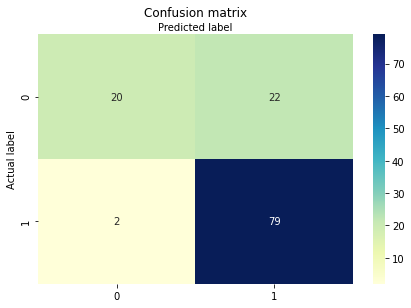

In [52]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_naive)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_naive))
print("Precision:",metrics.precision_score(Y_test, Y_pred_naive))
print("Recall:",metrics.recall_score(Y_test, Y_pred_naive))

Accuracy: 0.8048780487804879
Precision: 0.7821782178217822
Recall: 0.9753086419753086


In [54]:
print("f1 score:",metrics.f1_score(Y_test,Y_pred_naive))

f1 score: 0.868131868131868


In [55]:
import pickle

In [56]:
pickle.dump(lr_classify,open('model.pkl','wb'))